In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':1,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Industries'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-03-04 to 2019-06-28 - 62'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-shrp'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
XAR,62,3.388719,2.255368,1.428615,4.438061
XLP,62,2.265017,1.545058,1.358105,4.021399
VDC,62,1.776224,1.555340,1.034859,4.396198
ITB,62,3.321420,4.096430,0.770123,5.964365
IGF,62,1.519339,1.906587,0.709473,2.242252
VPU,62,1.373866,1.775353,0.679977,3.258989
XLU,62,1.407262,1.854719,0.668886,3.426057
ITA,62,1.924077,2.663100,0.659911,5.402399
EMLP,62,1.035024,1.422521,0.610435,2.697335


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['XAR'] 0.2589974828962389 0.6 0.887612215381661 1.4286147324854221
['XAR', 'XLP'] -0.11879544769723127 0.428618249118069 0.8459459620706603 1.3933596588859607
['XAR', 'IGF'] -0.21129668247828193 0.18971595987854872 0.6680313043747729 1.0690439467316035
['XAR', 'VPU'] -0.34876820798141284 -0.06417719834182478 0.7697049791740762 1.0542959888136643
['XAR', 'XLU'] -0.36710947172726427 -0.1047709934094534 0.7864117990860171 1.048750277403828
['XAR', 'EMLP'] -0.5497152584639916 -0.2437297202433163 0.7135395720828519 1.0195251103035272


['XAR', 'EMLP']

In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['XAR', 'EMLP'], sr=0)

['XAR', 'EMLP'] 0.4698098518395356 -0.2437297202433163 0.7135395720828519 1.0195251103035272
['XAR', 'EMLP', 'XLP', 'VDC'] 0.3520214860978116 0.3743718975717787 0.7776495885260329 1.1080034145203355
['XAR', 'EMLP', 'XLP', 'ITB'] 0.2962580947172565 0.2402001562656461 0.8560579384516105 1.0418193392397201
['XAR', 'EMLP', 'XLP', 'IGF'] 0.1886199783878843 0.3186676668145722 0.6699523115733121 1.0266569917178348
['XAR', 'EMLP', 'XLP', 'VPU'] 0.12291146376264364 0.20212231478967993 0.7207891489729638 1.0192830127588652
['XAR', 'EMLP', 'XLP', 'XLU'] 0.12210608310575899 0.19296352417682483 0.7291425589289342 1.016510157053947
['XAR', 'EMLP', 'ITB', 'IGF'] 0.11707357672475815 0.14997296712109143 0.7671006096036668 0.8796614831625413
['XAR', 'EMLP', 'ITB', 'VPU'] 0.03760427078142703 0.019666823778108578 0.8179374470033185 0.8722875042035718


['XAR', 'EMLP', 'ITB', 'VPU']

In [6]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 6, ['XAR', 'EMLP', 'ITB', 'VPU'], sr=0)

['XAR', 'EMLP', 'ITB', 'VPU'] 0.03760427078142703 0.019666823778108578 0.8179374470033185 0.8722875042035718
['XAR', 'EMLP', 'ITB', 'VPU', 'XLP'] -0.21972152600635736 0.16507257463905606 0.8152058993545868 0.9694509204201573
['XAR', 'EMLP', 'ITB', 'VPU', 'XLP', 'VDC'] -0.4988432439115409 0.2752785897631755 0.8258781663252837 0.9803522423814289
['XAR', 'EMLP', 'ITB', 'VPU', 'XLP', 'IGF'] -0.6011641140964479 0.2447559042134159 0.7540799816901363 0.9261212938464286
['XAR', 'EMLP', 'ITB', 'VPU', 'XLP', 'XLU'] -0.6201305671077049 0.18632928629841075 0.7935401465938845 0.9193567374038367
['XAR', 'EMLP', 'ITB', 'VPU', 'IGF', 'XLU'] -0.6454241178463948 0.22034062145835 0.7342352606952554 0.811251500019051


['XAR', 'EMLP', 'ITB', 'VPU', 'IGF', 'XLU']

In [7]:
quote.setup_mask(['XAR', 'EMLP', 'ITB', 'VPU'])
quote.find_optimal_ratio(21, 2, .95)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


({'XAR': 0.24, 'EMLP': 0.48, 'ITB': 0.06, 'VPU': 0.17}, 1.7443, 0.9825)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,62.0,1.795942,1.061965,-0.734026,1.114451,1.897124,2.405445,4.327940,1.534208,2.407629
XAR,62.0,3.388719,2.255368,-1.934580,1.877334,3.581815,4.969018,7.885071,1.428615,4.438061
ITB,62.0,3.321420,4.096430,-3.981024,0.702721,2.251743,7.105352,13.079428,0.770123,5.964365
IGF,62.0,1.519339,1.906587,-1.714665,0.122683,1.063346,3.025059,5.352718,0.709473,2.242252
VPU,62.0,1.373866,1.775353,-1.713539,-0.000010,1.246654,2.899430,5.136484,0.679977,3.258989
EMLP,62.0,1.035024,1.422521,-1.655893,-0.020176,1.247272,1.915043,3.694941,0.610435,2.697335


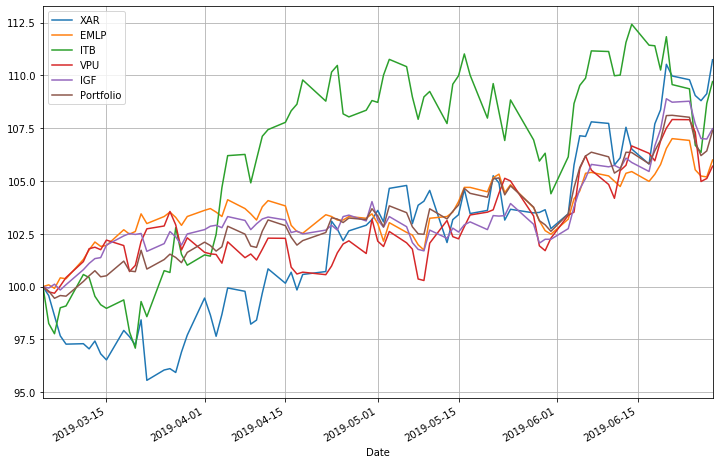

In [8]:
%pylab inline
quote.setup_mask(['XAR', 'EMLP', 'ITB', 'VPU', 'IGF'])
quote.graph(21, {'IGF': .05, 'XAR': 0.24, 'EMLP': 0.48, 'ITB': 0.06, 'VPU': 0.17})